Gaussian Naive Bayes Classifier on Breast Cancer Dataset



Steps i followed

Load dataset from scikit-learn
 Train/test split
 Feature scaling with StandardScaler
 Train GaussianNB model. Hyperparameter tuning with GridSearchCV
 Model evaluation with Accuracy, ROC AUC, Classification Report
 Visualization of Confusion Matrix and ROC Curve

GaussianNB Parameters that i  tuned
var_smoothing
  
   preventing division by zero in probabilities   if one feature has very small variance
    

GaussianNB assumes features are continuous and normally distributed.
 Works well with small datasets, less suited for very high-dimensional data.Hence chose this data

In [1]:
#Importing all necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve)



In [2]:
#loading the breast cancer dataset

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [24]:
y_series = pd.Series(y, name="target") # From  numpy to pd series conversion


In [25]:
y_series.value_counts()# somewhat balanced

# 1 is beningn non cancerous  and 0 is malignant  Cancerous

,count
target,
1,357
0,212


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
#Train and test with test size 20 percent

In [27]:
#Scaling features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Hyperparameter tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

grid = GridSearchCV(
    GaussianNB(),
    param_grid=param_grid,
    cv=5,  # Doing  5-fold cross-validation to check overfitting
    scoring="accuracy",  # Accuracy or f1 score
    n_jobs=-1
)

In [ ]:
#Starting gaussian nb

clf = GaussianNB()
clf.fit(X_train_scaled, y_train)


In [30]:
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9298245614035088
ROC AUC: 0.9867724867724867

Classification report:
               precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



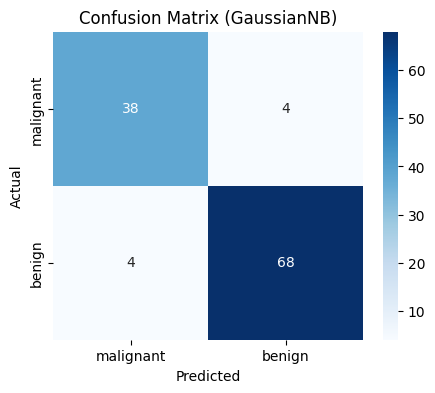

In [32]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GaussianNB)")
plt.show()

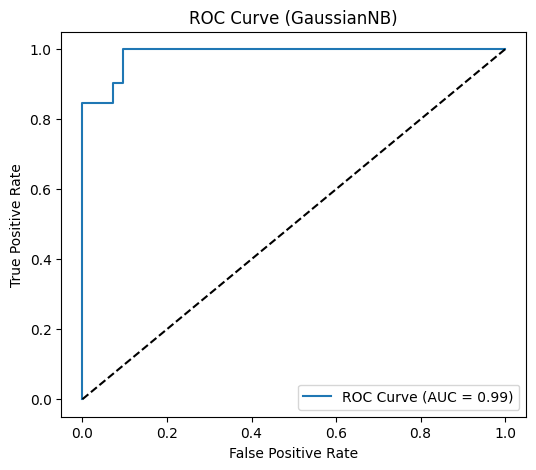

In [33]:
#ROC curve visualization
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (GaussianNB)")
plt.legend()
plt.show()

Conclusion

In this project, I built and evaluated a Gaussian Naive Bayes classifier on the Breast Cancer Wisconsin dataset.A small dataset thats a perfect fit for NB
GNB is perfect for continious features

The key hyperparameter tuned was var_smoothing, which plays a crucial role in preventing numerical instability by adding a small constant to each variance. It solves divison by 0 problem

After training and tuning

The model achieved an accuracy of ~93% and a ROC AUC of 0.99, indicating excellent discriminatory power between malignant and benign tumors.

The confusion matrix showed only 8 misclassifications out of 114 test cases.

Both precision and recall were strong for each class, demonstrating balanced performance.

The ROC curve visualization further confirmed that the classifier makes reliable predictions across different thresholds, with very low false positive and false negative rates.

Key Takeaways

GaussianNB is a fast, interpretable algorithm that works well for continuous, normally distributed features like this dataset.

Even though Naive Bayes makes a strong independence assumption, with the right data and preprocessing, it can deliver high performance.

Hyperparameter tuning of var_smoothing is essential to stabilize probability estimates and avoid numerical instability.

ROC AUC and confusion matrix together provide a complete picture of performance:

ROC AUC shows overall separability.

Confusion matrix highlights the exact misclassifications.

In [36]:
import joblib

# saving scaler model and metadata as a tuple

joblib.dump((clf, scaler, data.target_names), "susnata_gaussian_nb_model.joblib")

['susnata_gaussian_nb_model.joblib']

Some limitations like naive assumption that is no feature relation is utopian in real life. Also the assumption that features of every class is normally distributed might also not hold true is what makes this model less powerful compared to xg boost rf etc.ALso its very sensitive to scaling or else results become very derogatory